<a href="https://colab.research.google.com/github/suryakanthPS/DS_Mini-Projects/blob/main/As14_Q1_DT_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np

In [ ]:
#import data
data = pd.read_csv("/content/Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Urban'] = le.fit_transform(data['Urban'])
data['Undergrad'] = le.fit_transform(data['Undergrad'])
data['Marital.Status'] = le.fit_transform(data['Marital.Status'])
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


## Model Building

In [ ]:
#Dividing the data into independent and dependent variable
#X = pd.concat ([data.iloc[:,0:4],data.iloc[:,5]],axis=1)
X = data.drop(['Undergrad'],axis=1)
y = data['Undergrad']
X

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,2,68833,50047,10,1
1,0,33700,134075,18,1
2,1,36925,160205,30,1
3,2,50190,193264,15,1
4,1,81002,27533,28,0
...,...,...,...,...,...
595,0,76340,39492,7,1
596,0,69967,55369,2,1
597,0,47334,154058,0,1
598,1,98592,180083,17,0


In [ ]:
#Splitting the dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

### Model building by GINI method - Regression problems

In [ ]:
# fitting GINI method DT
from sklearn.tree import DecisionTreeClassifier
gini = DecisionTreeClassifier(criterion = 'gini', max_depth =3)
gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#Model prediction
y_pred = gini.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#Model accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
print(cm)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)
print("Accuracy=", acc*100)

[[35 32]
 [22 31]]
Accuracy= 55.00000000000001


### Model building by Entropy method - classification problems

In [ ]:
# fitting Entropy method DT
from sklearn.tree import DecisionTreeClassifier
entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth =3)
entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

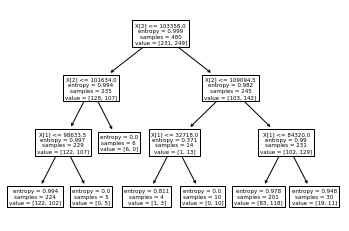

In [ ]:
#plot decision tree
from sklearn import tree
tree.plot_tree(entropy);

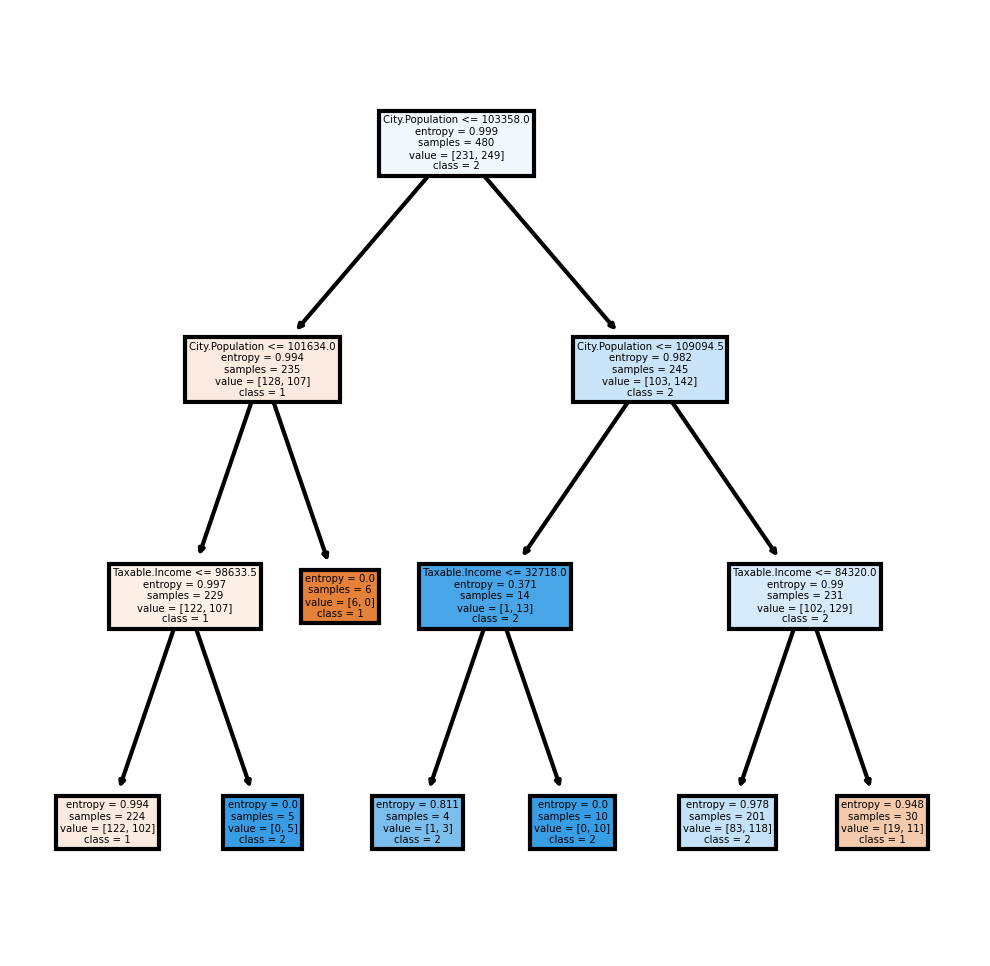

In [ ]:
import matplotlib.pyplot as plt
fn = ['Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['1', '2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(entropy,
               feature_names = fn,
               class_names = cn,
               filled = True);

In [ ]:
#Model prediction
y_pred = entropy.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#Model accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
print(cm)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)
print("Accuracy score :", acc*100)

[[35 32]
 [22 31]]
Accuracy score : 55.00000000000001
